In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

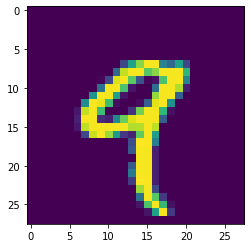

In [4]:
plt.imshow(train_images[4])

In [5]:
data = MNISTDataset(train_images.reshape([-1,784]),train_labels,
                   test_images.reshape([-1,784]),test_labels,batch_size=128)

In [6]:
train_steps = 1000
learning_rate = 0.01

W = tf.Variable(np.zeros([784,10]).astype(np.float32))
b = tf.Variable(np.zeros(10,dtype=np.float32))

In [7]:
for step in range(train_steps):
    img_batch,lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        logits = tf.matmul(img_batch,W)+b
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,labels = lbl_batch))
    
    grads = tape.gradient(xent,[W,b])
    W.assign_sub(learning_rate*grads[0])
    b.assign_sub(learning_rate*grads[1])
    
    if not step%100:
        preds = tf.argmax(logits,axis=1,output_type=tf.int32)
        acc=tf.reduce_mean(tf.cast(tf.equal(preds,lbl_batch),tf.float32))
        print("Loss:  {}     |     Accuracy:  {}".format(xent,acc))

Loss:  2.3025853633880615     |     Accuracy:  0.1328125
Loss:  1.5727407932281494     |     Accuracy:  0.78125
Loss:  1.2918236255645752     |     Accuracy:  0.765625
Loss:  0.8938482999801636     |     Accuracy:  0.8359375
Loss:  0.8642217516899109     |     Accuracy:  0.8515625
Starting new epoch...
Loss:  0.8197478652000427     |     Accuracy:  0.859375
Loss:  0.6347735524177551     |     Accuracy:  0.875
Loss:  0.7386946678161621     |     Accuracy:  0.8359375
Loss:  0.6880355477333069     |     Accuracy:  0.828125
Loss:  0.6126734018325806     |     Accuracy:  0.8515625
Starting new epoch...


In [8]:
test_preds = tf.argmax(tf.matmul(data.test_data, W) + b, axis=1,output_type=tf.int32)

acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))

print(acc)

tf.Tensor(0.8698, shape=(), dtype=float32)
